In [1]:
import gymnasium as gym
from PPO import PPO
import highway_env
from matplotlib import pyplot as plt
import numpy as np

{'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle', 'screen_width': 600, 'screen_height': 150, 'centering_position': [0.3, 0.5], 'scaling': 5.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 4, 'vehicles_count': 20, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 30, 'ego_spacing': 1.5, 'vehicles_density': 1, 'collision_reward': -1, 'right_lane_reward': 0.1, 'high_speed_reward': 0.4, 'lane_change_reward': 0, 'reward_speed_range': [20, 30], 'normalize_reward': True, 'offroad_terminal': False}


In [2]:
config1 = {
  "observation": {"type": "Kinematics"},
  "action": {"type": "DiscreteMetaAction"},
  "lanes_count": 4,
}

train_env = gym.make("highway-fast-v0", render_mode='rgb_array', config=config1)
eval_env = gym.make("highway-fast-v0", render_mode='human', config=config1)
watch_env = gym.make("highway-v0", render_mode='human', config=config1)

Random policy average return: 10.816288215084327
training length: 20
iteration 0: Mean episode return = 9.371, Mean discounted episode return = 4.919
iteration 1: Mean episode return = 9.603, Mean discounted episode return = 4.911
iteration 2: Mean episode return = 13.323, Mean discounted episode return = 5.731
iteration 3: Mean episode return = 15.829, Mean discounted episode return = 5.956
iteration 4: Mean episode return = 17.280, Mean discounted episode return = 6.380
iteration 5: Mean episode return = 15.334, Mean discounted episode return = 5.936
iteration 6: Mean episode return = 17.606, Mean discounted episode return = 6.307
iteration 7: Mean episode return = 17.529, Mean discounted episode return = 6.425
iteration 8: Mean episode return = 19.484, Mean discounted episode return = 6.583
iteration 9: Mean episode return = 19.237, Mean discounted episode return = 6.601
Eval over 50 episodes: Return = 20.835, standard_deviation = 2.045, Length = 29.6 steps, Crash rate = 2.0%
iterat

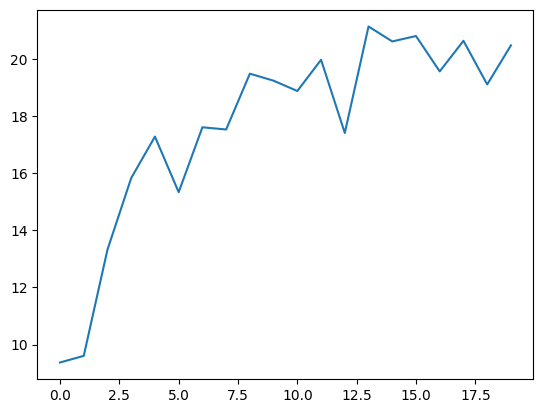

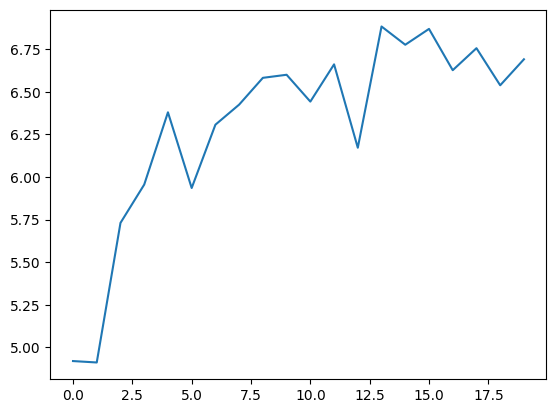

Episode 1 return: 11.827
Episode 2 return: 27.583
Episode 3 return: 28.472
Episode 4 return: 26.694
Episode 5 return: 26.694
Episode 6 return: 29.361
Episode 7 return: 28.472
Episode 8 return: 29.361
Episode 9 return: 29.361
Episode 10 return: 29.361
Episode 11 return: 27.583
Episode 12 return: 26.694
Episode 13 return: 27.583
Episode 14 return: 29.361
Episode 15 return: 29.361
Episode 16 return: 26.961
Episode 17 return: 28.472
Episode 18 return: 28.472
Episode 19 return: 28.472
Episode 20 return: 29.361
Episode 21 return: 29.361
Episode 22 return: 28.472
Episode 23 return: 28.472
Episode 24 return: 27.850
Episode 25 return: 27.850
Episode 26 return: 28.472
Episode 27 return: 27.583
Episode 28 return: 28.472
Episode 29 return: 29.361
Episode 30 return: 28.472
Episode 31 return: 28.472
Episode 32 return: 26.694
Episode 33 return: 28.472
Episode 34 return: 26.694
Episode 35 return: 28.472
Episode 36 return: 28.472
Episode 37 return: 29.361
Episode 38 return: 28.472
Episode 39 return: 27

In [ ]:
agent = PPO(train_env, eval_env=eval_env, watch_env=watch_env)


# Load the newest model to see performance
#agent.load("newest_model.pt")

# Evaluate performance of model that selects actions randomly for comparison
random_performance = agent.evaluate_random(50)
print("Random policy average return:", np.mean(random_performance))


# agent.train(training_length, model_save_location, evaluation_frequency, save_model_boolean, model_save_location)
rewards_history, returns_history, length_history, crash_rate_history, total_rewards_history, discounted_rewards_history = agent.train(20, 10, False, "Arbitrary_model.pt")

#print(rewards_history)
#print(returns_history)
#print(length_history)
#print(crash_rate_history)
print(total_rewards_history)
print(discounted_rewards_history)
#plt.plot(rewards_history)
#plt.show()
#plt.plot(returns_history)
#plt.show()
#plt.plot(length_history)
#plt.show()
#plt.plot(crash_rate_history)
#plt.show()
plt.plot(total_rewards_history)
plt.show()
plt.plot(discounted_rewards_history)
plt.show()


average_score = agent.test_and_watch(n_episodes = 100)
print(average_score)
